# Data Analytics - Challenge


The goal of this challenge is to analyze a restaurant invoices. Some celles are already implemented, you just need to **run** them. Some other cells need you to write some code.

Start the challenge by running the two following cells:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips_df = pd.read_csv("C:/Users/Christopher/Documents/reconv/Le Wagon/Intro to python/tips.csv")

---

Display the 10 first rows of the dataset (no need to sort)

<details>
    <summary> Reveal solution</summary>

<p>
You can use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html"><code>pandas.DataFrame.head()</code></a> function:
    
<pre>
tips_df.head(10)
</pre>
</p>
</details>

In [72]:
# Your code here
tips_df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

---

How many days per week is the restaurant open?

<details>
    <summary> Reveal solution</summary>

<p>
You can use the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html"><code>pandas.Series.unique()</code></a> function combiend with the <code>len()</code> Python built-in.
    
<pre>
len(tips_df['day'].unique())
</pre>
</p>
</details>

In [5]:
len(tips_df["day"].unique())


4

---

 What day of the week is there more bills? Plot this with a Seaborn Countplot.

<details>
    <summary> Reveal solution</summary>

<p>
<pre>
tips_df['day'].value_counts()
</pre>
    
<pre>
sns.countplot(data=tips_df, x='day', order=['Thur', 'Fri', 'Sat', 'Sun'])
</pre>
</p>
</details>

In [7]:
tips_df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

<Axes: xlabel='day', ylabel='count'>

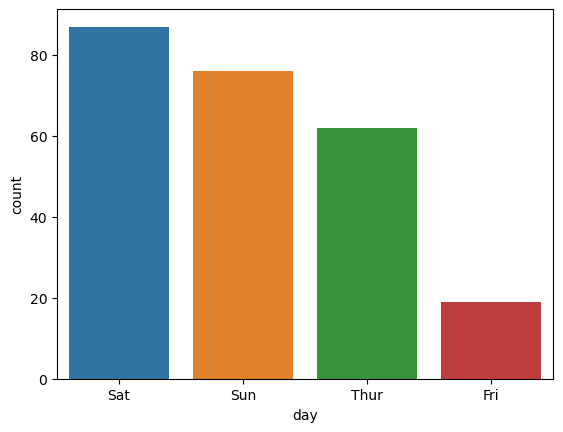

In [20]:
sns.countplot(data=tips_df, x='day', order = tips_df['day'].value_counts().index)

<Axes: xlabel='day', ylabel='count'>

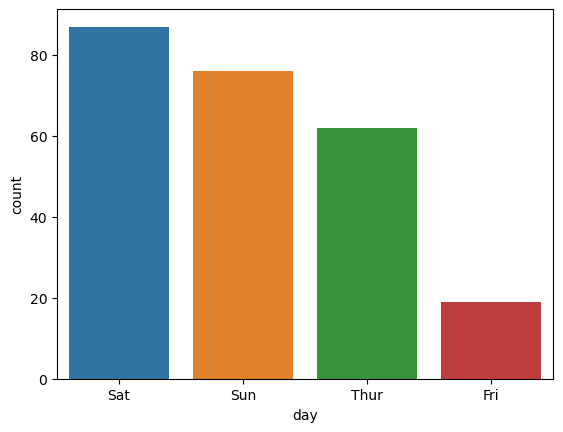

In [19]:
order = tips_df['day'].value_counts().index
sns.countplot(data=tips_df, x='day', order=order)


---

 Try to do some other countplots, varying `x` with one of the categorical column (`sex`, `smoker`, `time`)

<Axes: xlabel='day', ylabel='count'>

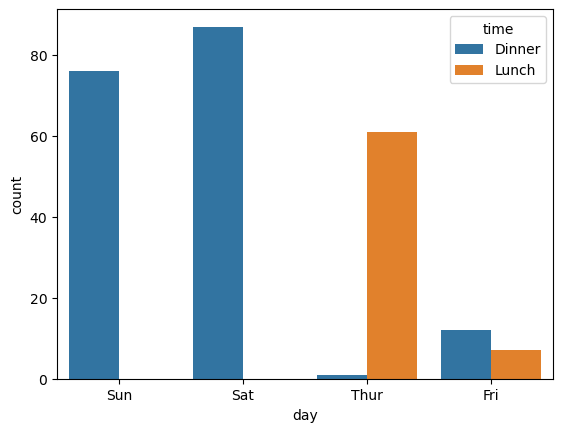

In [46]:
sns.countplot(data = tips_df, x = "day", hue= 'time')

---
 Let's plot the distribution of `total_bill` based on a given category. Start with `day`:

```python
sns.catplot(data=tips_df, x='day', y='total_bill', kind="box")
```

1. Change the value of `x` with one of the categorical column of the dataset and the value of `kind` (`"bar"`, `"box"`, `"violin"`, `"boxen"`)
1. Change the value of `y` with one of the numerical column of the dataset

<Axes: xlabel='day', ylabel='tip'>

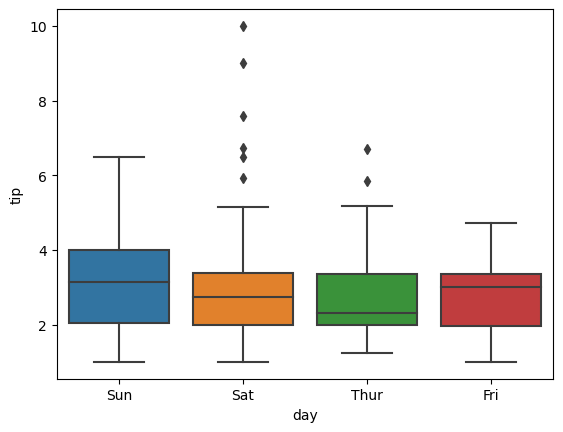

In [45]:
sns.boxplot(data = tips_df, x='day', y='tip')

---
 Let's use [`seaborn.FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

1. Run the cell below. What do you observe?
2. Change `col` in the first line with another column (e.g. `"time"`). Run the cell again. What do you observe?

C:\Users\Christopher\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


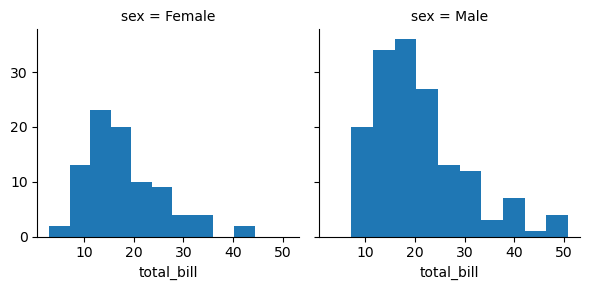

In [54]:
g = sns.FacetGrid(tips_df, col="sex")
g.map(plt.hist, "total_bill")

---
 Let's continue with FacetGrid and add a `row="smoker"` parameter. How many cells do you get in the plot?

<details>
    <summary> Reveal solution</summary>

You get 2 * 4 = 8 cells!
    
<pre>
g = sns.FacetGrid(tips_df, col="day", row="smoker")
g.map(plt.hist, "total_bill")
</pre>
</p>
</details>

C:\Users\Christopher\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


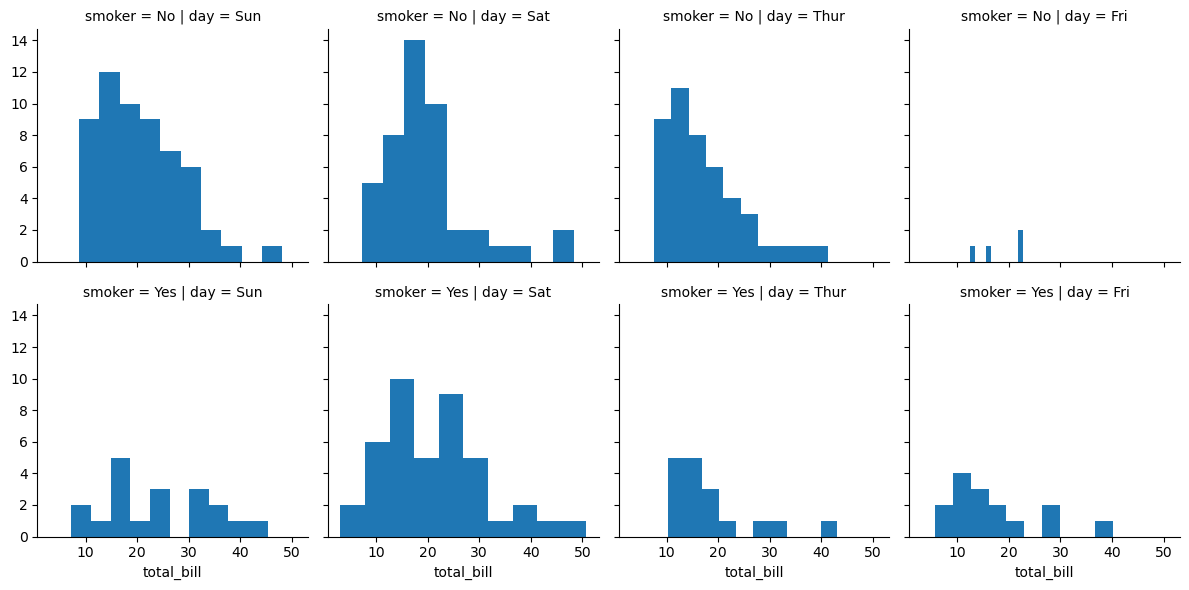

In [56]:
g = sns.FacetGrid(tips_df, col="day", row = 'smoker')
g.map(plt.hist, "total_bill")

## Correlation

Let's start looking for correlation between columns in the dataset.


---
 What is your intuition about the relationship between the columns `tip` and `total_bill`?

---
 Let's look at the data to see if our intuition is correct. We will do a **scatterplot** with `x` being `total_bill` and `y` the tip.

C:\Users\Christopher\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


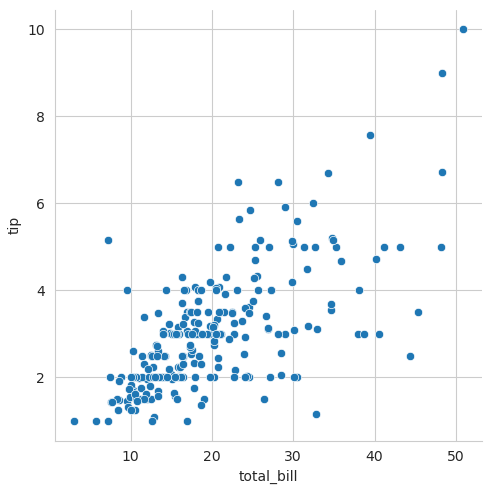

In [86]:
with sns.axes_style(style="whitegrid"):
    sns.relplot(x="total_bill", y="tip", data=tips_df)

---
 Another way of looking at this data is to use a [`seaborn.jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html).

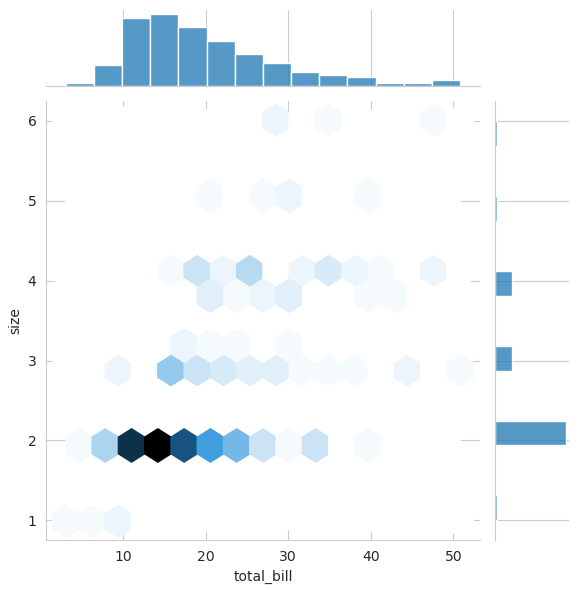

In [75]:
with sns.axes_style("whitegrid"):
    sns.jointplot(x="total_bill", y="size", kind='hex', data=tips_df)

 A very useful tool to **identify** correlations is the [`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html):

C:\Users\Christopher\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


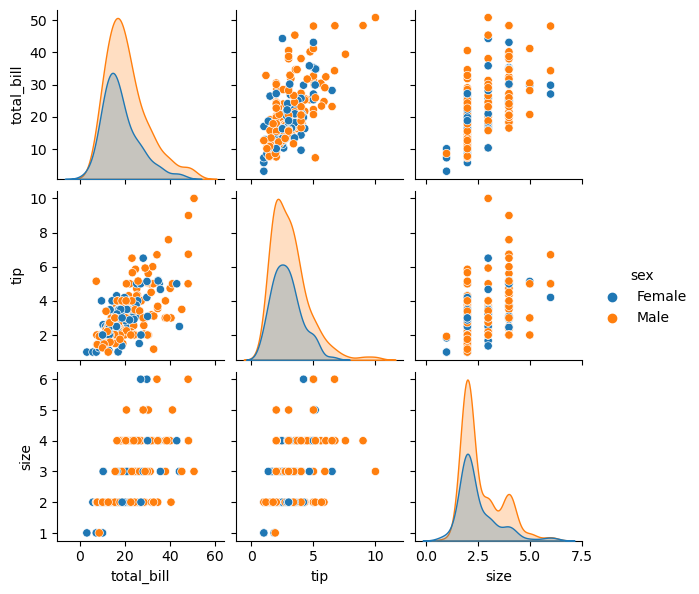

In [83]:
sns.pairplot(tips_df, height=2, hue='sex')

## Regression

We are not doing Machine Learning yet but we can use [`seaborn.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to graphically read a linear correlation between two columns:

C:\Users\Christopher\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


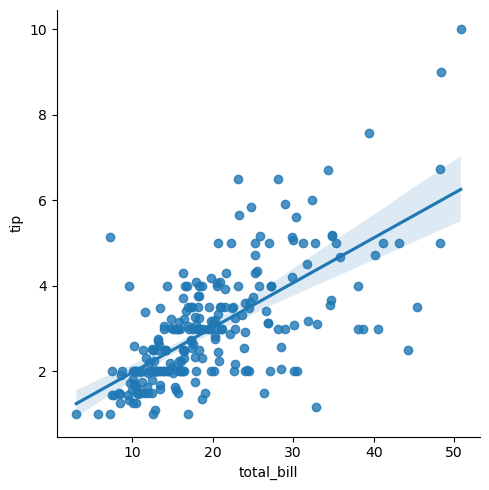

In [85]:
sns.lmplot(x="total_bill", y="tip", data=tips_df)

## Good job!

Save your notebook, go back to the **Le Wagon - Learn** platform to upload your progress. A quiz awaits you!